# Project: The Movie DB (TMDB) Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>I will be investigating The Movie DB (TMDB) data set which is a popular tool used to obtain an array of information on over 10,000 films released from 1960 to 2015. I will analyse the active production companies, genre popularity and genre profitability.

>In particular, the questions I will be exploring include:

> 1) Which Primary Genres are the most popular (i.e. highest average popularity score)?

> 2) Which production companies have produced the most films since the inception of the data set and what is the percentage breakdown of major production company activity?

> 3) Which Primary Genre had the highest average profit (inflation-adjusted) and which film was the most profitable overall (inflation-adjusted)?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot  as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling
We will read the data, have a quick look at the first few rows and get a picture of the data types and the number of data points.

### General Properties

In [47]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [48]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning
>First we will check for any duplicate rows (i.e. each column holds the same value) and remove them.

>Subsequently, we will review the data types to ensure that the columns are holding appropriate data types (i.e. string types are displayed as objects and numerical values are either integer or floats.)

>As we will be conducting further analysis and exploration specifically on Genres, it will be important to clean the data with respect to this column (remove nulls and add a Primary Genre column after separating the multivalues)

In [50]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.duplicated().sum() #Check number of duplicates

1

In [51]:
df.drop_duplicates(inplace = True) #There is only one duplicate row so we have dropped this from the data set.

In [52]:
df.dtypes #Check data types

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

>The data types appear to hold appropriate data types and do not require any conversions.

>Now we will look at the genres column. We will need to drop any nulls from the dataframe.

In [53]:
df['genres'].isnull().sum() #count null genres (i.e. genre not assigned)

23

In [54]:
df = df.dropna(subset=['genres']) #drop NaN in genres column from df

In [55]:
df['genres'].isnull().sum() #Check 0 nulls for genre

0

>We should separate the genres and print them in a list to ensure they are readable for further analysis.

In [56]:
genre_com = list(map(str,(df['genres']))) #List of genre combinations
genre = []
for i in genre_com:
    split_genre = list(map(str, i.split('|'))) #splitting genres for movies with multi value genres
    for j in split_genre:
        if j not in genre:
            genre.append(j)#add single all single genre movies to df_genre
# printing list of seperated genres.
print(genre)


['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'Foreign']


> There are several multi-value elements which appear in the genres column. After reviewing the data, it appears that the first element listed in the multi-value rows under genres represents the "Primary Genre" of the film. I have made the decision to add a new column called "p_genre" to conduct a more targeted analysis on genres. 

>I feel this allows the analysis on genre popularity and genre profitability to be targeted towards the film's primary genre and gives less weight to a more common reappearing genre (such as Action, Drama or Comedy which appear very frequently as secondary genres). 

>Another potential issue which may arise is with closely linked genres such as Thriller/Mystery/Crime where there is potential cross-over in the genre specification. Should these genres be separated as the genres may share highly similar features?

>I feel that the genre specification can be considered as a limitation of the analysis with either applying approach and has the potential to skew the resulting conclusions.

In [57]:
df_gen = df.genres.str.split('|') #splitting genres out of dataframe
df.loc[:,'p_genre'] = df_gen.str[0] #adding a new Primary Genre column to the dataframe

In [58]:
df.groupby('p_genre')['id'].nunique() #Checking that the data sample is reasonable for analysis

p_genre
Action             1590
Adventure           586
Animation           403
Comedy             2319
Crime               380
Documentary         432
Drama              2453
Family              144
Fantasy             272
Foreign               9
History              44
Horror              915
Music               100
Mystery             125
Romance             186
Science Fiction     214
TV Movie             78
Thriller            491
War                  59
Western              42
Name: id, dtype: int64

In [61]:
df.head() #checking if p_genre has been added appropriately

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,p_genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


>As we want to analyse profit, we will need to create a new column. A better measure to compare the profitabilty of films over timeframe from 1960 to 2015 is inflation_adjusted profit which subtracts the 2015 equivalent inflation-adjusted budget from the 2015 equivalent inflation-adjusted revenue.

>Here I made a new 'profit_adj' column

In [62]:
df.loc[:,'profit_adj'] = df['revenue_adj'] - df['budget_adj'];
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,p_genre,profit_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,1.210949e+09


> As we will be conducting further exploratory analysis on production companies, it might be worthwhile to get a picture of how many production companies are presented in the list.

> Here I created a list of the separated production companies. It appears that there a lot more than I initially expected and highlights the presence of thousands of smaller film producers (independent). This will require further consideration in our exploratory analysis.

In [63]:
# Obtaining a list of production companies
prd_details = list(map(str,(df['production_companies'])))
prd = []
for i in prd_details:
    split_prd = list(map(str, i.split('|')))
    for j in split_prd:
        if j not in prd:
            prd.append(j)
# count elements in list of seperated genres.
len(prd)

7875

<a id='eda'></a>
## Exploratory Data Analysis

We will now compute statistics and create visualizations with the goal of addressing the research questions posed in the Introduction section. We will apply a systematic approach, looking at one variable at a time, and then following it up by looking at relationships between variables.

### Question 1: Which Primary Genres are the most popular (i.e. highest average popularity score)? 

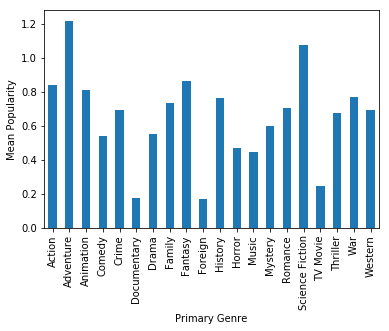

In [64]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
pg_pop = df.groupby('p_genre')['popularity'].mean()
popt = pg_pop.plot.bar();
popt.set_xlabel("Primary Genre");
popt.set_ylabel("Mean Popularity");

> From the barplot above it can be seen that the Adventure genre appears to have the highest average popularity score Primary Genre from the data set. Please note that this is a more targeted analysis of the primary genre of a film as opposed to analysing the multiple of genres listed per film.


### Question 2: Which production companies have produced the most films since the inception of the data set and what is the percentage breakdown of major production company activity?

I made an assumption here that a 'major production company' is one that has produced at least 100 films in the data set.

In [65]:
split_prd = df['production_companies'].str.cat(sep = '|') #separating out "|" in the production_companies column
split_prd = pd.Series(split_prd.split('|')) #converting split data to a series so we can filter
prd_cnt = split_prd.value_counts(ascending = False) #sorting list in descending order by count.
m_prd_c = prd_cnt[prd_cnt >= 100] #defining major production companies as production companies that have produced at least 100 films in the dataset.
m_prd_c

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      213
Touchstone Pictures                       178
Columbia Pictures Corporation             160
TriStar Pictures                          147
Miramax Films                             139
Relativity Media                          108
dtype: int64

>It can be seen that Universal Pictures has produced the most films over from 1960 to 2015, closely followed by Warner Bros. It should be noted that the top 3 (Universal, Warner Bros. and Paramount) have been significantly more active movie producers than the rest of the data set.

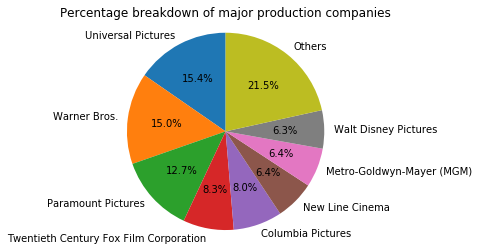

In [66]:
label = list(map(str,m_prd_c[0:8].keys()))
label.append('Others')
mpc = m_prd_c[0:8]
sum = 0
for i in m_prd_c[8:]:
    sum += i
mpc['sum'] = sum
fig1, ax1 = plt.subplots()
ax1.pie(mpc,labels = label, autopct = '%1.1f%%', startangle = 90)
ax1.axis('equal')
plt.title("Percentage breakdown of major production companies")
plt.show()

>Above I have plotted a pie chart with the top 8 major production companies (i.e. produced more than 100 films since 1960) and grouped the remaining producers together in Others. It can be seen that the production companies are broken down in clusters with the top 3 producers ahead by a significant margin from the rest and the remaining producers are quite closely grouped.

### Question 3: Which Primary Genre had the highest average profit (inflation-adjusted) and which film had the highest profit overall (inflation-adjusted)?

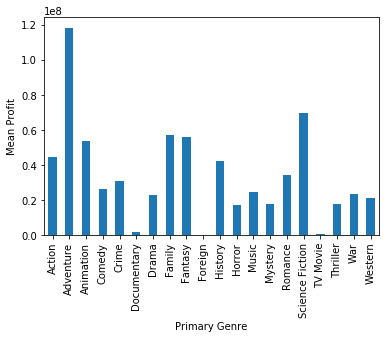

In [67]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
pg_pro = df.groupby('p_genre')['profit_adj'].mean()
pg_pr = pg_pro.plot.bar();
pg_pr.set_xlabel("Primary Genre");
pg_pr.set_ylabel("Mean Profit");

>The most profitable (inflation-adjusted) Primary Genre in the data set is Adventure by a significant margin. 

In [68]:
def max_obs(col_name):
   
    #maximum
    #taking the index (row) of the highest number in any specified column, passing col_name
    max_pt = df[col_name].idxmax()
    #calling by index number above,storing row details to a variable, max_data
    max_data = pd.DataFrame(df.loc[max_pt])
    return max_data
max_obs('profit_adj')

,1329
id,11
imdb_id,tt0076759
popularity,12.0379
budget,11000000
revenue,775398007
original_title,Star Wars
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
homepage,http://www.starwars.com/films/star-wars-episod...
director,George Lucas
tagline,"A long time ago in a galaxy far, far away..."


>The most profitable (inflation-adjusted) film in the data set was the original Star Wars released in 1977, generating an infl-adj. profit of $2.75b

<a id='conclusions'></a>
## Conclusions

>From our data wrangling we have cleaned the data, modified the genre column to specify and create a Primary Genre column, added an inflation-adjusted profit column and split out the production companies to conduct our EDA and answer the questions around genre, profitability and production companies.

>In our EDA we found that the Adventure genre as a primary genre had the highest average popularity score. This was visualised in a bar plot. I chose to use a single Primary Genre to ensure that the analysis was more targeted towards the main genre that a film depicts (rather than the popularity of common genres such as Action/Comedy/Drama being skewed towards the overall mean popularity) and receives the full weight of the popularity score. In contrast, the limitation to using the Primary Genre is that it may not adequately capture the popularity for movies with clear multiple genres.

>Additionally, we defined a major production company as production companies that have produced over 100 films from 1960 to 2015 (the timeframe of the data set). We found that Universal Pictures was the most active production company, closely followed by Warner Bros and this was presented in a pie chart. I was also surprised by the high presence of small production companies which produced a very few number of films.

> Finally we found that the most profitable (inflation-adjusted) Primary Genre was Adventure and the most profitable (inflation-adjusted) film was Star Wars. I chose to use the inflation-adjusted measure to adequately compare the budget and revenue figures from different time periods.


In [3]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0